In [4]:
#堆排序
def sift(li,low,high):   #定义向下调整函数（列表，最前地址，最后地址）
    i = low        #父指针，始终指向根节点
    j = 2*i+1      #子指针，先指向i的左子节点
    tmp = li[low]  #存储堆顶元素
    while j <= high:  #保证j指向的地址还有元素
        if j + 1 <= high and li[j+1] > li[j]: #两子节点比大小，大的留下
            j = j + 1
        if li[j] > tmp:                       #与父结点比大小，大的为父节点
            li[i] = li[j]
            i = j     #i指向下级父节点
            j = 2*i+1 #j指向i的左子节点
        else:                                 #若原父节点大，跳出循环
            break
    else:
        li[i] = tmp                           #把tmp填入空位

def heap_sort(li):            #创建堆排序函数
    #建堆,建堆后才可保证向下调整正确
    n = len(li)
    for i in range(n-1,-1,-1):#(最后父节点地址，到地址0，步长-1)
        sift(li,i,n-1)        #i表示调整部分根的下标，high只需指向堆的最后一个元素
    #堆顶最大元素转移至堆底，堆元素-1，向下调整    循环
    for i in range(n-1,-1,-1):
        li[0],li[i] = li[i],li[0]
        sift(li,0,i-1)        #i-1是新的high

li = [i for i in range(100)]  #建立随机0-99的列表
import random 
random.shuffle(li)
print(li)
heap_sort(li)
print(li)

[38, 77, 55, 18, 41, 54, 37, 91, 99, 30, 26, 4, 29, 61, 83, 10, 50, 59, 80, 43, 13, 81, 75, 76, 52, 73, 89, 98, 19, 23, 34, 63, 8, 78, 14, 96, 84, 93, 65, 69, 85, 5, 68, 94, 9, 1, 42, 31, 6, 28, 11, 7, 66, 44, 56, 25, 95, 51, 33, 82, 87, 74, 48, 35, 67, 16, 97, 72, 3, 90, 71, 92, 22, 39, 15, 79, 58, 86, 70, 40, 60, 24, 2, 57, 46, 49, 0, 36, 88, 27, 20, 45, 21, 32, 64, 17, 62, 12, 53, 47]
[0, 1, 3, 4, 5, 7, 8, 8, 10, 12, 14, 19, 20, 20, 22, 24, 24, 28, 29, 33, 34, 35, 35, 36, 36, 36, 36, 37, 37, 38, 39, 39, 40, 42, 44, 45, 46, 46, 47, 47, 48, 49, 50, 50, 50, 50, 50, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 81, 81, 82, 84, 85, 85, 85, 86, 87, 87, 88, 89, 90, 92, 93, 93, 94, 95, 96, 97, 97, 97, 98, 99]


In [1]:
#利用heapq完成堆排序
import heapq
import random

li = list(range(100))
random.shuffle(li)
print(li)

heapq.heapify(li)  #建堆
n = len(li)
for i in range(n):
    print(heapq.heappop(li),end = ' , ') #end默认为换行

[65, 87, 63, 96, 25, 6, 78, 88, 37, 38, 86, 29, 24, 69, 55, 85, 33, 19, 18, 52, 77, 5, 11, 42, 79, 75, 54, 14, 99, 35, 82, 9, 60, 53, 17, 12, 66, 98, 32, 4, 2, 72, 36, 8, 31, 59, 22, 1, 81, 20, 74, 80, 91, 28, 89, 73, 13, 76, 95, 84, 23, 70, 15, 68, 71, 49, 97, 83, 94, 16, 3, 39, 56, 34, 92, 41, 44, 50, 90, 51, 7, 46, 0, 26, 47, 27, 48, 21, 67, 40, 57, 45, 58, 30, 62, 93, 61, 64, 43, 10]
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 

In [2]:
#快速排序
def partition(li,left,right): #定义列表间函数，[较小元素，tmp,较大元素]
    tmp = li[left]            #节点存储
    while left < right:      #循环终止条件
        while left < right and li[right] >= tmp: #从右边找比tmp小的元素，找到后停止循环并把元素插入左边空位
            right -= 1         #若大于tmp则右指针往左一步
        li[left] = li[right]   #右边的值写入左边空位
        while left < right and li[left] <= tmp:  #从左边找比tmp大的元素，找到后停止循环并把元素插入右边空位
            left += 1
        li[right] = li[left]
    li[left] = tmp    # 左右指针相遇后tmp归位
    return left
def  quick_sort(li,left,right):
    if left < right:  #至少两个元素，递归终止条件
        mid = partition(li,left,right) #mid赋值partition的返回值，即tmp地址
        quick_sort(li,left,mid-1)      #引入递归排左边
        quick_sort(li,mid+1,right)     #引入递归，排右边
        
import random

li = list(range(100))
random.shuffle(li)    #打乱0-99的列表
print(li)

quick_sort(li,0,len(li)-1)
print(li)


[29, 9, 27, 71, 43, 37, 96, 87, 53, 98, 51, 84, 83, 62, 99, 40, 86, 67, 89, 56, 52, 50, 88, 17, 12, 5, 64, 30, 65, 70, 58, 74, 77, 42, 31, 54, 91, 61, 68, 75, 34, 92, 78, 49, 13, 45, 23, 79, 18, 44, 28, 73, 8, 39, 55, 60, 81, 16, 85, 11, 57, 32, 4, 21, 63, 38, 19, 97, 26, 66, 24, 76, 6, 47, 80, 22, 36, 48, 3, 90, 7, 82, 1, 25, 15, 59, 14, 20, 69, 95, 94, 72, 33, 0, 35, 93, 41, 10, 2, 46]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [1]:
#模块分类
#1.内置模块：re,random
#2.第三方模块：beautifulsoup,tkinter
#3.自建模块

#模块存放位置
import sys
for i in sys.path:
    print(i)
    
#C:\Users\wch
#D:\anaconda3\python38.zip
#D:\anaconda3\DLLs
#D:\anaconda3\lib                  内置模块
#D:\anaconda3

#D:\anaconda3\lib\site-packages    第三方模块
#D:\anaconda3\lib\site-packages\win32
#D:\anaconda3\lib\site-packages\win32\lib
#D:\anaconda3\lib\site-packages\Pythonwin
#D:\anaconda3\lib\site-packages\IPython\extensions
#C:\Users\wch\.ipython
#                             自建模块位置可自定义，推荐放在项目下自建的lib文件夹中

C:\Users\wch
D:\anaconda3\python38.zip
D:\anaconda3\DLLs
D:\anaconda3\lib
D:\anaconda3

D:\anaconda3\lib\site-packages
D:\anaconda3\lib\site-packages\win32
D:\anaconda3\lib\site-packages\win32\lib
D:\anaconda3\lib\site-packages\Pythonwin
D:\anaconda3\lib\site-packages\IPython\extensions
C:\Users\wch\.ipython


In [1]:
print('71,90,134')

71,90,134


In [4]:
#图片下载
import urllib.request
from selenium import webdriver
import re
import os
import random
import time

def use_agent():
    iplist = ['115.221.242.112:9999','1.199.30.171:9999']
    
    proxy_support = urllib.request.ProxyHandler({'https':random.choice(iplist)})
    opener = urllib.request.build_opener(proxy_support)
    print('use_agent')
    
def open_url(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18362')
    page = urllib.request.urlopen(req)
    response = page.read()
    html = str(response)[9126:18400]
    
    #print(str(response))
    return html

def save_img(html):
    use_agent()
    #加()部分为子组，只返回子组，或子组组合成元组返回。.需要\.转义
    #p = '<img src="([^"]+\.gif)"'  #正则表达式中[^"]好像只能用一次
    p = 'objURL":"([^"]+\.[jg]..)"'
    imglist = re.findall(p,str(html))
    print(len(imglist))
    
    for each in imglist:
        print(each)
        time.sleep(1)
        filename = each.split('/')[-1]
        
        try:
            urllib.request.urlretrieve(each,filename,None)
        except:
            print('end')
if __name__ == '__main__':
    if not os.path.exists('picture'): #此处也可用try
        os.mkdir('picture')
    os.chdir('picture')
    for i in range(2,3):
        url = 'https://www.tupianzj.com/mingxing/xiezhen/20190130/180221_'+str(i)+'.html'
        html = open_url(url)
        save_img(html)


use_agent
0


In [2]:
import numpy as np
import pandas as pd

s = pd.Series([1,3,5,np.nan,6,8])
print(s)
dates = pd.date_range('20201022',periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
print(df)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-10-22  0.591370  0.044217 -0.409622  1.464560
2020-10-23 -0.085278  0.811673 -0.774645  0.676969
2020-10-24  0.285630  1.232652 -1.918886 -0.806495
2020-10-25 -1.778872  0.882291 -0.631436  0.671553
2020-10-26 -0.832654 -1.440504  0.665799  2.124650
2020-10-27  0.154944 -0.746289  0.089874  0.313297


In [8]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20201115'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D':np.array([3]*4,dtype='int32'),
                    'E':pd.Categorical(['test','train','test','train']),
                    'F':'foo'    
})      #index行指标
print(df2)
print('140')
print(df2.dtypes)

     A          B    C  D      E    F
0  1.0 2020-11-15  1.0  3   test  foo
1  1.0 2020-11-15  1.0  3  train  foo
2  1.0 2020-11-15  1.0  3   test  foo
3  1.0 2020-11-15  1.0  3  train  foo
140
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [3]:
import pandas as pd
grads = pd.read_excel('成绩.xlsx',index_col='id')
#grads           #dataframe格式
#print(grads)    #我也不知道这是什么形式，反正没dataframe好看
grads.head(5)    #从上往下前n行

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120105068,7.0,7.0,6.0,225.0,19.0,19.0,18.0,298.0,14.0,14.0,14.0,201.0,14.0,14.0,14.0,203.0
3120301259,21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0
3120332023,37.0,37.0,35.0,164.0,28.0,28.0,27.0,376.0,94.0,94.0,93.0,521.0,NaN,NaN,NaN,NaN
3120132004,37.0,37.0,36.0,171.0,26.0,26.0,25.0,368.0,57.0,57.0,56.0,250.0,NaN,NaN,NaN,NaN
3120118053,104.0,104.0,101.0,203.0,22.0,22.0,20.0,264.0,67.0,67.0,65.0,345.0,NaN,NaN,NaN,NaN


In [8]:
grads.tail(3)    #从后往前，后n行

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120305454,23.0,13.0,12.0,253.0,15.0,13.0,13.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120101208,32.0,31.0,30.0,97.0,37.0,37.0,35.0,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20118038,NaN,NaN,NaN,NaN,38.0,38.0,26.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
grads.index      #打印行标签

Int64Index([3120105068, 3120301259, 3120332023, 3120132004, 3120118053,
            3120305718, 3120132006, 3120301183, 3120303014, 3120305664,
            3120301047, 3120319111, 3120101220, 3120301223, 3120305660,
            3120103152, 3120101059, 3120305679, 3120305601, 3120332044,
            3120319056, 3120101202, 3120101127, 3120101238, 3120101019,
            3120101240, 4120101106, 3120101221, 3120999178, 3120118049,
            3120305683, 3120101246, 3120105015, 3120332026, 3120301080,
            3120305442, 3120118037, 3120101260, 3120103153, 3120319071,
            3120104196, 3120305579, 3120101244, 3120305689, 3120103322,
            3120319059, 3120301233, 3120301231, 3120101273, 3120101017,
            3120301269, 3120101212, 3120118047, 3120305694, 3120101074,
            3120332011, 3120101015, 3120332035, 3120101271, 3120118038,
            3120319067, 3120101097, 3120305456, 3120101095, 3120101215,
            3120305590, 3120101151, 3120118046, 3120101211, 3120

In [11]:
grads.columns   #打印列表签

Index(['cell_01', 'code_cell_01', 'valid_cell_01', 'line_01', 'cell_02',
       'code_cell_02', 'valid_cell_02', 'line_02', 'cell_03', 'code_cell_03',
       'valid_cell_03', 'line_03', 'cell_04', 'code_cell_04', 'valid_cell_04',
       'line_04'],
      dtype='object')

In [12]:
grads.describe()     #显示数据统计信息，dataframe形式

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
count,77.000000,77.000000,77.000000,77.000000,78.000000,78.000000,78.000000,78.000000,75.000000,75.000000,75.000000,75.000000,45.000000,45.000000,45.000000,45.000000
mean,63.636364,62.077922,56.610390,210.831169,43.897436,42.025641,36.333333,258.102564,59.813333,57.600000,54.280000,276.573333,37.933333,36.577778,33.333333,434.977778
std,55.046848,53.797810,49.317221,102.791102,41.163781,39.597643,34.712424,110.704660,48.382679,45.918847,43.094353,144.887484,35.832565,34.889754,32.469566,1124.291362
min,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,25.000000,23.000000,20.000000,153.000000,22.000000,22.000000,20.000000,201.750000,17.000000,17.000000,16.000000,196.500000,15.000000,14.000000,13.000000,205.000000
50%,40.000000,40.000000,36.000000,201.000000,36.500000,33.500000,28.500000,257.000000,53.000000,53.000000,51.000000,250.000000,27.000000,26.000000,25.000000,219.000000
75%,82.000000,82.000000,76.000000,239.000000,45.000000,44.750000,42.500000,342.750000,90.500000,89.500000,87.500000,378.500000,46.000000,46.000000,43.000000,304.000000
max,244.000000,213.000000,197.000000,586.000000,201.000000,201.000000,194.000000,561.000000,200.000000,200.000000,181.000000,649.000000,152.000000,149.000000,135.000000,7683.000000


In [13]:
grads.sort_index()      #按照行标签排序

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
20118038,NaN,NaN,NaN,NaN,38.0,38.0,26.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120101015,7.0,7.0,6.0,131.0,5.0,5.0,4.0,222.0,8.0,8.0,7.0,278.0,4.0,4.0,3.0,230.0
3120101016,4.0,4.0,3.0,236.0,45.0,31.0,29.0,356.0,52.0,49.0,46.0,216.0,27.0,27.0,26.0,552.0
3120101017,12.0,12.0,9.0,139.0,4.0,4.0,3.0,181.0,2.0,2.0,1.0,198.0,3.0,3.0,2.0,7683.0
3120101019,23.0,23.0,22.0,162.0,40.0,35.0,34.0,249.0,24.0,22.0,21.0,262.0,30.0,30.0,29.0,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120332035,51.0,51.0,49.0,230.0,45.0,45.0,44.0,321.0,43.0,43.0,42.0,283.0,46.0,46.0,39.0,219.0
3120332036,38.0,38.0,32.0,141.0,21.0,21.0,20.0,298.0,59.0,59.0,58.0,271.0,NaN,NaN,NaN,NaN
3120332044,62.0,62.0,60.0,222.0,37.0,36.0,35.0,338.0,109.0,90.0,89.0,432.0,NaN,NaN,NaN,NaN


In [14]:
grads.sort_values(by='line_01')     #以第一列为基准排序

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120101097,1.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
3120332026,21.0,21.0,20.0,26.0,NaN,NaN,NaN,NaN,19.0,19.0,18.0,80.0,NaN,NaN,NaN,NaN
3120305694,18.0,18.0,7.0,42.0,8.0,8.0,3.0,46.0,7.0,7.0,4.0,325.0,6.0,6.0,0.0,0.0
3120301255,4.0,4.0,3.0,71.0,14.0,14.0,10.0,90.0,9.0,9.0,7.0,134.0,32.0,32.0,30.0,330.0
3120101221,22.0,21.0,11.0,76.0,22.0,22.0,21.0,106.0,3.0,3.0,1.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120101238,74.0,74.0,70.0,514.0,3.0,3.0,1.0,220.0,2.0,2.0,1.0,308.0,8.0,8.0,5.0,244.0
3120301223,203.0,203.0,195.0,586.0,201.0,201.0,194.0,458.0,54.0,54.0,52.0,329.0,79.0,79.0,76.0,168.0
3120319071,NaN,NaN,NaN,NaN,12.0,12.0,11.0,74.0,3.0,3.0,3.0,112.0,7.0,7.0,5.0,201.0


In [15]:
grads[['line_01','line_02']]     #取前两列

,line_01,line_02
id,,
3120105068,225.0,298.0
3120301259,163.0,162.0
3120332023,164.0,376.0
3120132004,171.0,368.0
3120118053,203.0,264.0
...,...,...
3120305403,NaN,73.0
3120109017,112.0,20.0
3120305454,253.0,230.0


In [16]:
grads[0:3]             #取0-3行

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120105068,7.0,7.0,6.0,225.0,19.0,19.0,18.0,298.0,14.0,14.0,14.0,201.0,14.0,14.0,14.0,203.0
3120301259,21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0
3120332023,37.0,37.0,35.0,164.0,28.0,28.0,27.0,376.0,94.0,94.0,93.0,521.0,NaN,NaN,NaN,NaN


In [17]:
grads.loc[[3120301255,3120332023],['line_01','line_02']]  #按标签，矩阵形式调取内容

,line_01,line_02
id,,
3120301255,71.0,90.0
3120332023,164.0,376.0


In [18]:
grads.at[3120301255,'line_01']   #按标签提取一个数据

71.0

In [22]:
grads.iloc[[1,5],[2,4]]         #按地址，矩阵形式调取内容，不可用：切片

,valid_cell_01,cell_02
id,,
3120301259,20.0,25.0
3120305718,25.0,75.0


In [23]:
grads.iat[1,1]                   #按地址提取一个数据

21.0

In [ ]:
print('160')
grads[grads['line_01']>=200]      #筛选标签line_01中数据大于200的值

In [25]:
grads['line_01']>=200             #说明

id
3120105068     True
3120301259    False
3120332023    False
3120132004    False
3120118053     True
              ...  
3120305403    False
3120109017    False
3120305454     True
3120101208    False
20118038      False
Name: line_01, Length: 80, dtype: bool

In [4]:
import numpy as np
grads[grads==np.nan]     #所有值均设为0

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120105068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120301259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120332023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120132004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120118053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120305403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120109017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120305454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
grads.iat[1,1]=0
grads.iat[1,1]

0.0

In [8]:
grads.loc[:,'line_01'] = np.array([200]*len(grads))
grads.loc[:,'line_01']
grads['total'] = np.nan
grads['total']
good = grads.dropna(how='any')
good.shape
grads['line_01'].fillna(value=1000)
grads.isna()
grads.mean()
grads.mean(1)
grads['total'] = grads[['line_01','line_02','line_03','line_04']].apply(np.sum,axis=1)
grads['total']
grads.groupby('cell_01').sum()
grads.to_excel('new_grads.xlsx')
print(180)

180


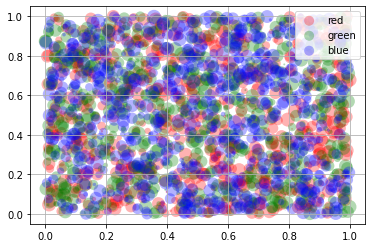

In [11]:
import matplotlib.pyplot as plt
from numpy.random import rand

fig,ax = plt.subplots()
for color in ['red','green','blue']:
    n=750
    x,y = rand(2,n)
    scale = 200.0 * rand(n)
    ax.scatter(x,y,c=color,s=scale,label=color,
              alpha=0.3,edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()
print(190)

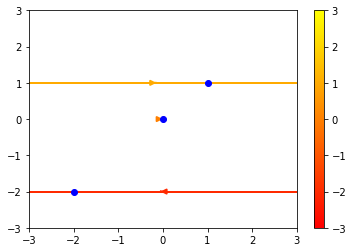

204


In [17]:
import numpy as np
import matplotlib.pyplot as plt

X,Y = (np.linspace(-3,3,100),
      np.linspace(-3,3,100))
U,V = np.mgrid[-3:3:100j,0:0:100j]
seed_points = np.array([[-2,0,1],[-2,0,1]])
fig0,ax0 = plt.subplots()
strm = ax0.streamplot(X,Y,U,V,color=U,linewidth=2,
                     cmap=plt.cm.autumn,start_points=seed_points.T)
fig0.colorbar(strm.lines)
ax0.plot(seed_points[0],seed_points[1],'bo')
ax0.axis((-3,3,-3,3))
plt.show()
print(204)